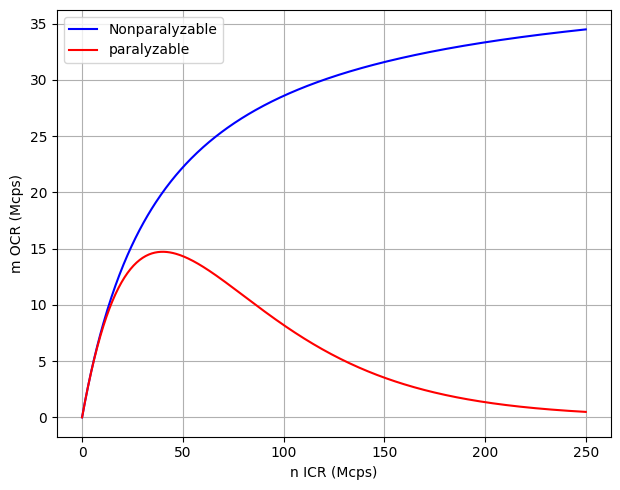

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 参数设置 ----------------
dead_time = 25e-9   # 死时间 100 ns
true_rate = np.linspace(1e0, 250e6, 500)  # 输入光子率 (photons/s)
# ---------------- 真实计数（无死时间） ----------------
counts_true = true_rate
# ---------------- 非瘫痪模式 (Nonparalyzable Model) ----------------
# 输出计数率公式: R_obs = R_true / (1 + R_true * τ)
counts_nonpar = true_rate / (1 + true_rate * dead_time)
counts_par = true_rate * np.exp(- true_rate * dead_time)
# ---------------- 微分曲线 ----------------
diff_true = np.gradient(counts_true, true_rate)
Non_Par_diff_120 = np.gradient(counts_nonpar, true_rate)
diff_par = np.gradient(counts_par, true_rate)
# ---------------- 绘图 ----------------
plt.figure(figsize=(12,5))

# 积分图 (计数率曲线)
plt.subplot(1,2,1)
# plt.plot(true_rate/1e6, counts_true/1e6, 'k--', label="True (no dead time)")
plt.plot(true_rate/1e6, counts_nonpar/1e6, 'b', label="Nonparalyzable")
plt.plot(true_rate/1e6, counts_par/1e6, 'r', label="paralyzable")
plt.xlabel("n ICR (Mcps)")
plt.ylabel("m OCR (Mcps)")
# plt.title("Integral curve")
plt.legend()
plt.grid(True)
 
# # 微分图 (增益)
# plt.subplot(1,2,2)
# plt.plot(true_rate/1e6, diff_true/1e6, 'k--', label="True")
# plt.plot(true_rate/1e6, Non_Par_diff_120/1e6, 'b', label="Nonparalyzable")
# plt.plot(true_rate/1e6, diff_par/1e6, 'r', label="paralyzable")
# plt.xlabel("Input photon rate (Mcps)")
# plt.ylabel("d(Output)/d(Input)")
# plt.title("Differential curve")
# plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # ---------------- Spek 光谱读取与信号生成函数 ----------------
# def load_signal_from_spek(filename, n_photons, I_mA=1.0, t_s=1.0, 
#                           A_pix=0.05*0.05, d=1.0, 
#                           res_sigma=0.0, plot=True):
#     """
#     从 Spek 导出的 txt 文件读取光谱，并生成光子能量分布
    
#     参数:
#         filename : str, Spek 导出的 txt 文件路径
#         n_photons : int, 要模拟的光子数
#         I_mA : 管电流 [mA]
#         t_s : 曝光时间 [s]
#         A_pix : 像素面积 [cm²]
#         d : 焦点到探测器距离 [m]
#         res_sigma : float, 能量分辨率 (keV)，若 >0 则对光子能量做高斯展宽
#         plot : bool, 是否绘制分布图
    
#     返回:
#         signal_energies : ndarray, 随机采样的光子能量数组
#     """
#     # 读入数据
#     data = np.loadtxt(filename, skiprows=1)
#     E = data[:,0]
#     flux = data[:,1]   # #/(keV·cm²·mAs)@1m
    
#     mAs = I_mA * t_s
#     flux_pix = flux * A_pix * (1/d**2) * mAs   # #/keV per pixel
#     rate_pix = flux_pix / t_s                  # cps/keV per pixel
    
#     # 概率密度分布
#     pdf = rate_pix / np.sum(rate_pix)
    
#     # 随机采样得到光子能量
#     signal_energies = np.random.choice(E, size=int(n_photons), p=pdf)
    
#     # 如果设置了能量分辨率，进行高斯展宽
#     if res_sigma > 0:
#         signal_energies = np.random.normal(signal_energies, res_sigma)
#         signal_energies = signal_energies[signal_energies > 0]  # 去掉负能量
    
#     # 绘图
#     if plot:
#         plt.figure(figsize=(8,5))
#         # 理论分布
#         plt.plot(E, pdf, 'k-', label="Theoretical PDF")
#         # 抽样结果直方图
#         plt.hist(signal_energies, bins=100, density=True, alpha=0.5, label="Sampled")
#         plt.xlabel("Energy [keV]")
#         plt.ylabel("Normalized counts")
#         title = f"Sampled spectrum (N={n_photons}, res_sigma={res_sigma} keV)"
#         plt.title(title)
#         plt.legend()
#         plt.grid(True)
#         plt.show()
    
#     return signal_energies


In [3]:
#------------- 这个谱 曲线 被归一化了 -    ------------------ 
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Spek 光谱读取与信号生成函数 ----------------
def load_signal_from_spek(filename, n_photons, I_mA=1.0, t_s=1.0, 
                          A_pix=0.05*0.05, d=1.0, 
                          res_sigma=0.0, plot=True):
    """
    从 Spek 导出的 txt 文件读取光谱，并生成光子能量分布
    
    参数:
        filename : str, Spek 导出的 txt 文件路径
        n_photons : int, 要模拟的光子数
        I_mA : 管电流 [mA]
        t_s : 曝光时间 [s]
        A_pix : 像素面积 [cm²]
        d : 焦点到探测器距离 [m]
        res_sigma : float, 能量分辨率 (keV)，若 >0 则对光子能量做高斯展宽
        plot : bool, 是否绘制分布图
    
    返回:
        signal_energies : ndarray, 随机采样的光子能量数组
    """
    # 读入数据
    data = np.loadtxt(filename, skiprows=1)
    E = data[:,0]      # 能量点
    flux = data[:,1]   # #/(keV·cm²·mAs)@1m
    
    mAs = I_mA * t_s
    flux_pix = flux * A_pix * (1/d**2) * mAs   # #/keV per pixel
    rate_pix = flux_pix / t_s                  # cps/keV per pixel

    # ----------------------
    # 构造分段概率分布 (保证连续性)
    # ----------------------
    E_edges = np.append(E, E[-1] + (E[-1]-E[-2]))   # 最后一个点外推
    pdf = rate_pix / np.sum(rate_pix)               # 归一化概率

    # 先选择能量区间
    bin_indices = np.random.choice(len(E), size=int(n_photons), p=pdf)
    # 再在区间内均匀采样 (避免落在单点)
    signal_energies = E[bin_indices] + np.random.rand(len(bin_indices)) * (E_edges[1]-E_edges[0])

    # 如果设置了能量分辨率，进行高斯展宽
    if res_sigma > 0:
        signal_energies = np.random.normal(signal_energies, res_sigma)
        signal_energies = signal_energies[signal_energies > 0]  # 去掉负能量

    # 绘图
    if plot:
        plt.figure(figsize=(8,5))
        # 理论分布
        plt.plot(E, pdf, 'k-', label="Theoretical PDF")
        # 抽样结果直方图
        plt.hist(signal_energies, bins=120, density=True, alpha=0.5, label="Sampled")
        plt.xlabel("Energy [keV]")
        plt.ylabel("Normalized counts")
        title = f"Sampled spectrum (N={n_photons}, res_sigma={res_sigma} keV, Emax={E.max()} keV)"
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return signal_energies


模拟光子数: 160000


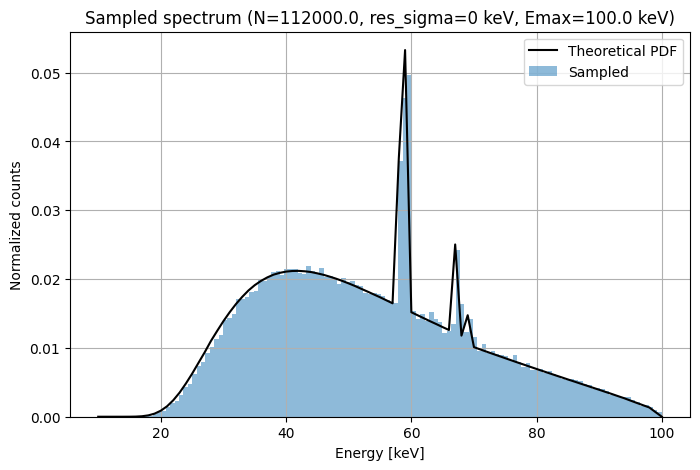

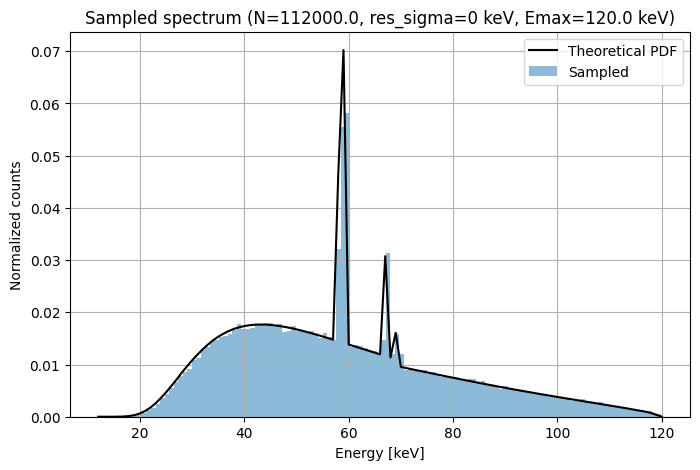

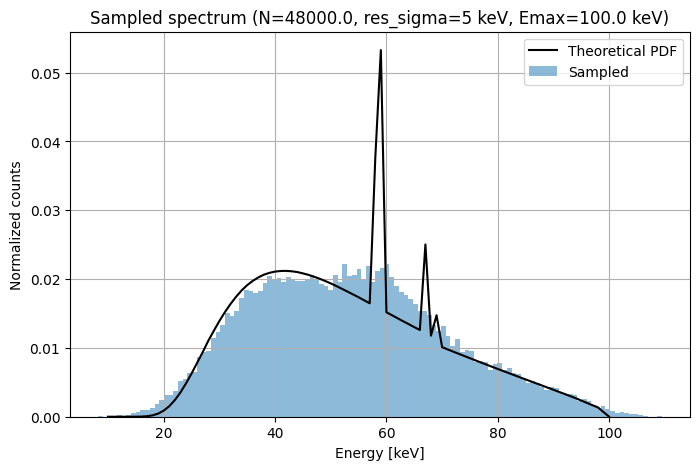

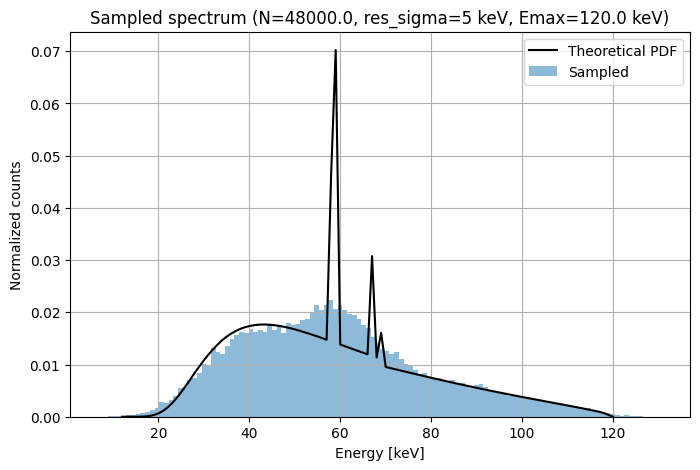

In [4]:

# ---------------- 参数 ----------------
# n_photons = int(1e6)   # 模拟光子数
integral_time = 400e-6  # 积分时间[s]   400（us）
dead_time = 25e-9       # 死时间[s]     15 ns
rate = 400e6             # 最大输入光子率 (photons/s)

n_photons = int(integral_time * rate)
print("模拟光子数:", n_photons)
# ---------------- 信号 + 噪声源 ----------------
# signal = np.random.normal(35, 14, int(0))   # 正态信号峰

signal_100 = load_signal_from_spek("spek_100.txt", n_photons*0.7, res_sigma=0,  plot=True)  # 30% 信号光子
signal_120 = load_signal_from_spek("spek_120.txt", n_photons*0.7, res_sigma=0, plot=True)  # 30% 信号光子 


signal_100_blur = load_signal_from_spek("spek_100.txt", n_photons*0.3, res_sigma=5,  plot=True)  # 30% 信号光子
signal_120_blur = load_signal_from_spek("spek_120.txt", n_photons*0.3, res_sigma=5, plot=True)

# 噪声
noise_dark = np.random.normal(35, 5, int(n_photons*0.3))   # 噪声峰
noise = np.random.normal(25, 5, int(0))   # 噪声峰

events_100 = np.concatenate([signal_100, noise])
events_120 = np.concatenate([signal_120, noise])
# events_100_blur = np.concatenate([signal_100_blur, noise])
# events_120_blur = np.concatenate([signal_120_blur, noise])

# no noise 
# events_100 = np.concatenate([signal_100]) 
# events_120 = np.concatenate([signal_120]) 



In [5]:
# ---------------- 积分谱计算函数（考虑死时间） ----------------
def integral_spectrum(events, thresholds, tau, T, mode="ideal", poisson_noise=False):
    spectrum = []
    for thr in thresholds:
        # 阈值以上的光子数
        N_thr = np.sum(events >= thr)
        # 当前输入光子率
        R_thr = N_thr / integral_time  

        if mode == "ideal":
            R_obs = R_thr
        elif mode == "nonpar":
            R_obs = R_thr / (1 + R_thr * tau)
        elif mode == "par":
            R_obs = R_thr * np.exp(-R_thr * tau)
        else:
            raise ValueError("Unknown mode")
        
 # 转换回总计数
        N_obs = R_obs * T

        # if poisson_noise:
        #     # 加入泊松噪声
        #     N_obs = np.random.poisson(N_obs)

        # 转换回计数率
        R_final = N_obs / T

        # 转换回总计数数目
        spectrum.append(R_final)
    return np.array(spectrum)

In [6]:
# ---------------- 阈值范围 ----------------
thresholds = np.linspace(0, 150, 300)

# ---------------- 三种模式的积分谱 ----------------
# 理想计数模式
ideal_int_120 = integral_spectrum(events_120, thresholds, dead_time, integral_time, mode="ideal",poisson_noise=True)
ideal_diff_120 =     -np.gradient(ideal_int_120, thresholds)

ideal_int_100 = integral_spectrum(events_100, thresholds, dead_time, integral_time, mode="ideal",poisson_noise=True)
ideal_diff_100 =     -np.gradient(ideal_int_100, thresholds)

# 非瘫痪模式
Non_Par_int_120 = integral_spectrum(events_120, thresholds, dead_time, integral_time, mode="nonpar",poisson_noise=True)
Non_Par_diff_120 =     -np.gradient(Non_Par_int_120, thresholds)

Non_Par_int_100 = integral_spectrum(events_100, thresholds, dead_time, integral_time, mode="nonpar",poisson_noise=True)
Non_Par_diff_100 =     -np.gradient(Non_Par_int_100, thresholds)

#瘫痪模式
Par_int_120 = integral_spectrum(events_120, thresholds, 35e-9, integral_time, mode="par",poisson_noise=True)
Par_diff_120 =     -np.gradient(Par_int_120, thresholds)

Par_int_100 = integral_spectrum(events_100, thresholds, dead_time, integral_time, mode="par",poisson_noise=True)
Par_diff_100 =     -np.gradient(Par_int_100, thresholds)

Par_int_noise = integral_spectrum(noise_dark, thresholds, dead_time, integral_time, mode="par",poisson_noise=True)
diff_par_noise = -np.gradient(Par_int_noise, thresholds) 

In [7]:
def plot_spectrum_subplot(ax, x, curves, xlabel, ylabel, title):
    """
    在子图 ax 上绘制多条曲线
    参数:
        ax     : matplotlib subplot 对象
        x      : 横坐标 (ndarray)
        curves : [(y, style, label)] 的列表
        xlabel, ylabel, title : 坐标轴标题 & 图标题
    """
    for y, style, label in curves:
        ax.plot(x, y/1e6, style, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


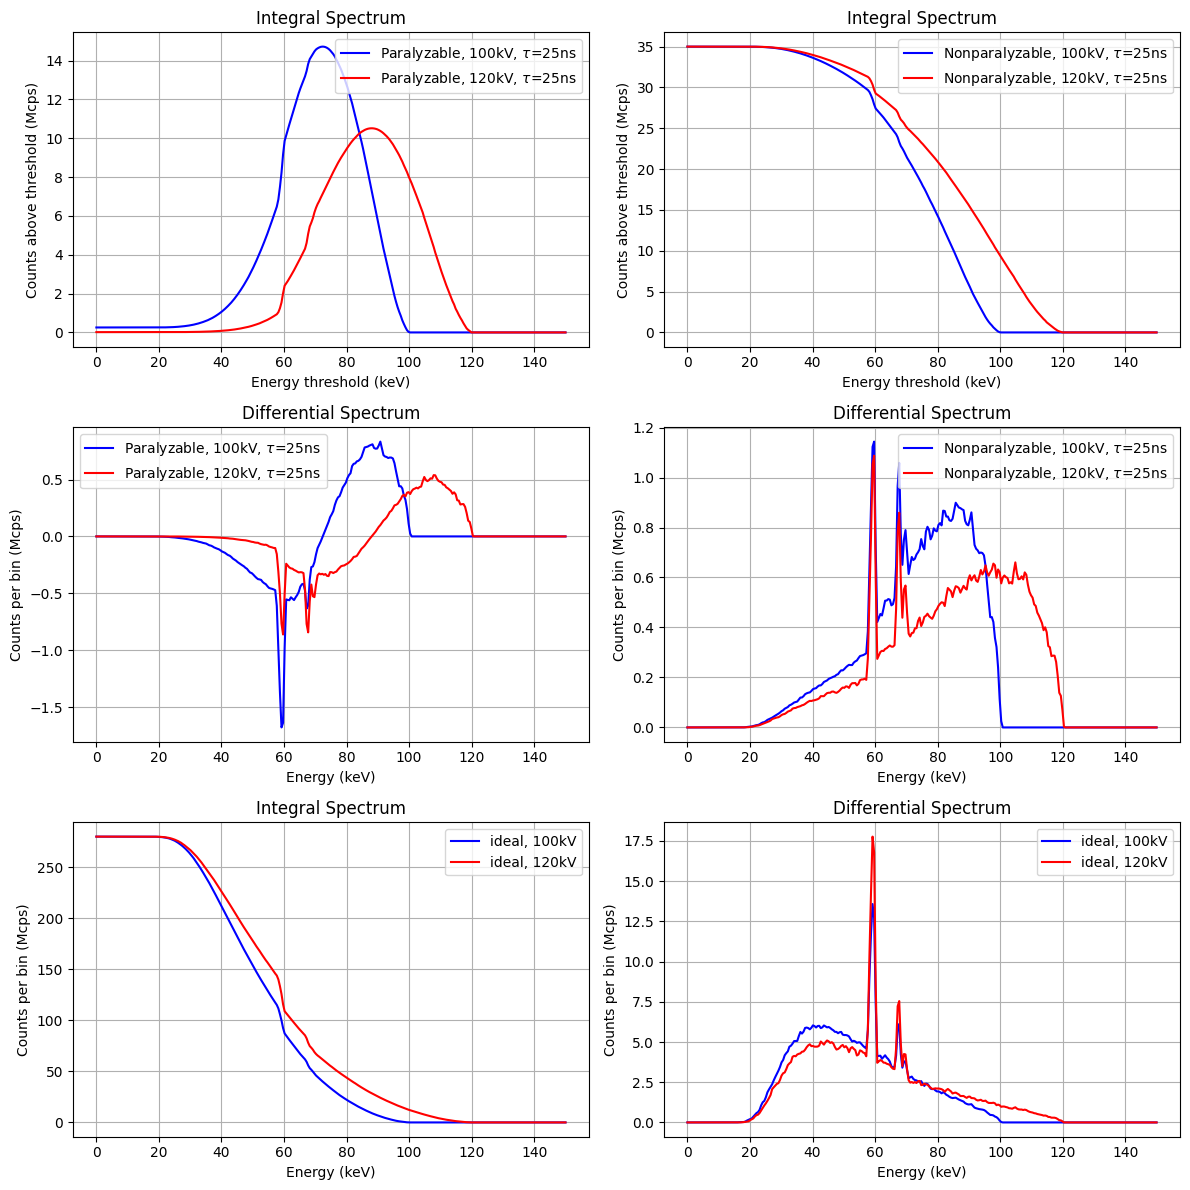

In [8]:
# 定义绘图配置：每个子图一条记录
plot_configs = [
    # (axis位置, y列表, xlabel, ylabel, title)
    (321, [  # 左上 (row=2, col=2, index=1)
        (Par_int_100, 'b', r"Paralyzable, 100kV, $\tau$=25ns"),
        (Par_int_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
     ], "Energy threshold (keV)", "Counts above threshold (Mcps)", "Integral Spectrum"),

    (322, [
        (Non_Par_int_100, 'b', r"Nonparalyzable, 100kV, $\tau$=25ns"),
        (Non_Par_int_120, 'r', r"Nonparalyzable, 120kV, $\tau$=25ns"),
     ], "Energy threshold (keV)", "Counts above threshold (Mcps)", "Integral Spectrum"),

    (323, [
        (Par_diff_100, 'b', r"Paralyzable, 100kV, $\tau$=25ns"),
        (Par_diff_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),

    (324, [
        (Non_Par_diff_100, 'b', r"Nonparalyzable, 100kV, $\tau$=25ns"),
        (Non_Par_diff_120, 'r', r"Nonparalyzable, 120kV, $\tau$=25ns"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),
    (325, [
     (ideal_int_100, 'b', r"ideal, 100kV"),
     (ideal_int_120, 'r', r"ideal, 120kV"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Integral Spectrum"),
    (326, [
     (ideal_diff_100, 'b', r"ideal, 100kV"),
     (ideal_diff_120, 'r', r"ideal, 120kV"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),

]

# ---------------- 绘图 ----------------
plt.figure(figsize=(12, 12))  # 高度调大些，避免挤

for subplot_id, curves, xlabel, ylabel, title in plot_configs:
    ax = plt.subplot(subplot_id)
    plot_spectrum_subplot(ax, thresholds, curves, xlabel, ylabel, title)

plt.tight_layout()
plt.show()


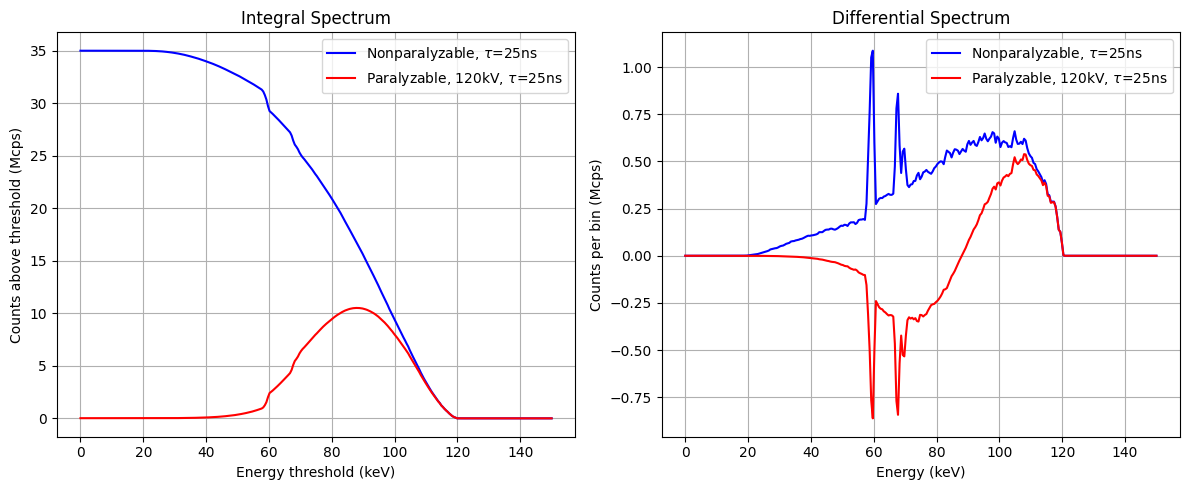

In [9]:
# ---------------- 比较不同计数模式的图片 ----------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# 积分谱
plot_spectrum_subplot(
    ax1, thresholds,
    [
        (Non_Par_int_120, 'b', r"Nonparalyzable, $\tau$=25ns"),
        (Par_int_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
    ],
    xlabel="Energy threshold (keV)",
    ylabel="Counts above threshold (Mcps)",
    title="Integral Spectrum"
)

# 微分谱
plot_spectrum_subplot(
    ax2, thresholds,
    [
        (Non_Par_diff_120, 'b', r"Nonparalyzable, $\tau$=25ns"),
        (Par_diff_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
    ],
    xlabel="Energy (keV)",
    ylabel="Counts per bin (Mcps)",
    title="Differential Spectrum"
)

plt.tight_layout()
plt.show()

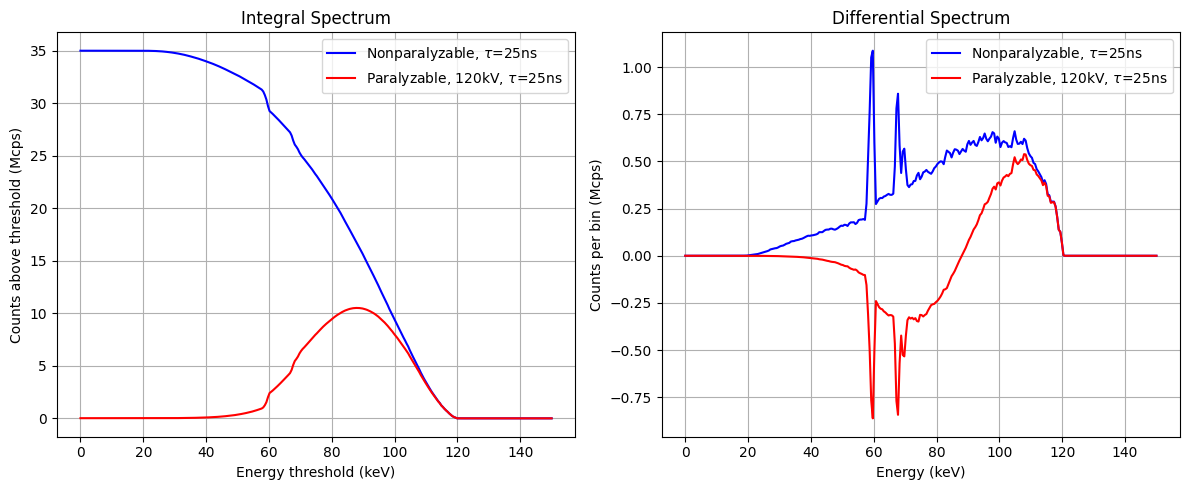

In [10]:

# ---------------- 绘图 ----------------
plt.figure(figsize=(12,5))

# 积分谱
plt.subplot(1,2,1)
# plt.plot(thresholds, ideal_int_120/1e6, 'k', label="Ideal detector")
plt.plot(thresholds, Non_Par_int_120/1e6, 'b', label=r"Nonparalyzable, $\tau$=25ns")
plt.plot(thresholds, Par_int_120/1e6, 'r', label=r"Paralyzable, 120kV, $\tau$=25ns")
# plt.plot(thresholds, Par_int_noise/1e6, 'g', label=r"Paralyzable, dark, $\tau$=25ns")
# plt.plot(thresholds, Par_int_noise/1e6, 'g', label=r"Paralyzable, $\tau$=15ns")
plt.xlabel("Energy threshold (keV)")
plt.ylabel("Counts above threshold (Mcps)")
plt.title("Integral Spectrum")
plt.legend()
plt.grid(True)

# 微分谱
plt.subplot(1,2,2)
# plt.plot(thresholds, ideal_diff_120/1e6, 'k', label="Ideal detector")
plt.plot(thresholds, Non_Par_diff_120/1e6, 'b', label=r"Nonparalyzable, $\tau$=25ns")
plt.plot(thresholds, Par_diff_120/1e6, 'r', label=r"Paralyzable, 120kV, $\tau$=25ns")
# plt.plot(thresholds, diff_par_noise/1e6, 'g', label=r"Paralyzable, $\tau$=15ns")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts per bin (Mcps)")
plt.title("Differential Spectrum")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


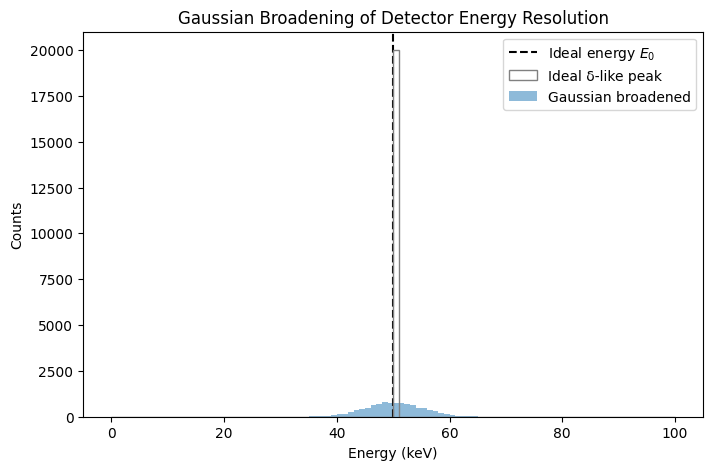

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 原始能量 (keV)
E0 = 50  
# 能量分辨率 (标准差, keV)
sigma = 5  

# 原始信号：理想情况下是delta函数，这里用直方图模拟
ideal_energies = np.full(20000, E0)

# 高斯展宽
broadened_energies = np.random.normal(E0, sigma, size=10000)

# 去掉负能量
broadened_energies_clipped = broadened_energies[broadened_energies > 0]

# 绘图
fig, ax = plt.subplots(figsize=(8,5))

# 理想能量（用竖线表示）
ax.axvline(E0, color='k', linestyle='--', label="Ideal energy $E_0$")

# 展宽前 vs 展宽后
ax.hist(ideal_energies, bins=100, range=(0,100), histtype='step', color='gray', label="Ideal δ-like peak")
ax.hist(broadened_energies, bins=100, range=(0,100), alpha=0.5, label="Gaussian broadened")
# ax.hist(broadened_energies_clipped, bins=100, range=(0,100), alpha=0.5, label="After removing $E<0$")

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")
ax.set_title("Gaussian Broadening of Detector Energy Resolution")
ax.legend()

plt.show()
